In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
print(yf.__version__)
##plt → This refers to matplotlib.pyplot, a Python library used for plotting
##'fivethirtyeight' is a predefined style in Matplotlib that makes plots look similar to those used by the FiveThirtyEight news website.
#It features clean visuals, bold colors, and gridlines for better readability

0.2.52


In [7]:
end = datetime.now()#Current date and time
start = datetime(end.year-15,end.month,end.day) # 15 years before the current date 
stock='BTC-USD'
stock_eth='ETH-USD'
stock_data=yf.download(stock,start=start,end=end)
stock_data_eth=yf.download(stock_eth,start=start,end=end)

#fetches historical Bitcoin price data from Yahoo Finance using the yfinance library


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
#first few rows of the Bitcoin price dataset downloaded from Yahoo Finance
stock_data.head()
#Close :The official closing price of Bitcoin for the day
#High	:The highest price Bitcoin reached that day
#Low	The lowest price Bitcoin reached that day
#Open	The price at which Bitcoin started trading that day
#Volume	Total number of Bitcoin transactions that day

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [9]:
stock_data_eth.head()

Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2017-11-09,320.884003,329.451996,307.056000,308.644989,893249984
2017-11-10,299.252991,324.717987,294.541992,320.670990,885985984
2017-11-11,314.681000,319.453003,298.191986,298.585999,842300992
2017-11-12,307.907990,319.153015,298.513000,314.690002,1613479936
2017-11-13,316.716003,328.415009,307.024994,307.024994,1041889984


In [10]:
#last 5 rows of the downloaded Bitcoin price data
'''
Date	The specific date of the price data.
Open	The Bitcoin price at the start of the trading day.
High	The highest Bitcoin price reached that day.
Low	    The lowest Bitcoin price reached that day.
Close	The Bitcoin price at the end of the trading day.
Price	Typically the same as Close or Adj Close.
Volume	The number of Bitcoins traded that day.'''
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-02-02,97688.976562,101430.664062,96216.078125,100661.539062,63091816853
2025-02-03,101405.421875,102514.171875,91242.890625,97681.101562,115400897748
2025-02-04,97871.820312,101745.617188,96208.109375,101398.718750,73002130211
2025-02-05,96615.445312,99113.210938,96174.828125,97878.007812,49125911241
2025-02-06,96447.585938,99168.609375,96192.046875,96547.320312,48174878720


In [11]:
stock_data_eth.tail()

Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,
2025-02-02,2868.692871,3161.894287,2755.474609,3118.611572,42060930305
2025-02-03,2884.566650,2919.477295,2159.280518,2868.078613,92453553253
2025-02-04,2735.051270,2888.250000,2636.165771,2883.818359,48795275985
2025-02-05,2787.779053,2824.400146,2701.104980,2735.225830,31960764447
2025-02-06,2700.644043,2854.785400,2694.003174,2788.293945,30566045696


In [12]:
stock_data.describe().T


,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3796.0,2.036715e+04,2.338758e+04,1.781030e+02,1.266712e+03,9.476459e+03,3.229531e+04,1.061463e+05
High,BTC-USD,3796.0,2.079944e+04,2.386797e+04,2.117310e+02,1.275888e+03,9.653905e+03,3.338079e+04,1.091149e+05
Low,BTC-USD,3796.0,1.986777e+04,2.283495e+04,1.715100e+02,1.247415e+03,9.262234e+03,3.110218e+04,1.052917e+05
Open,BTC-USD,3796.0,2.034313e+04,2.335902e+04,1.768970e+02,1.263065e+03,9.467410e+03,3.228623e+04,1.061473e+05
Volume,BTC-USD,3796.0,1.894068e+10,2.071876e+10,5.914570e+06,4.876130e+08,1.485601e+10,3.013087e+10,3.509679e+11


In [13]:
stock_data_eth.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,ETH-USD,2647.0,1.516077e+03,1.235661e+03,8.430830e+01,2.723157e+02,1.438661e+03,2.459703e+03,4.812087e+03
High,ETH-USD,2647.0,1.556737e+03,1.268662e+03,8.534274e+01,2.795355e+02,1.480564e+03,2.538797e+03,4.891705e+03
Low,ETH-USD,2647.0,1.469754e+03,1.199080e+03,8.282989e+01,2.650199e+02,1.378422e+03,2.381026e+03,4.718039e+03
Open,ETH-USD,2647.0,1.515341e+03,1.235934e+03,8.427969e+01,2.721848e+02,1.432876e+03,2.457500e+03,4.810071e+03
Volume,ETH-USD,2647.0,1.324776e+10,1.083471e+10,6.217330e+08,5.664999e+09,1.072048e+10,1.797339e+10,9.245355e+10


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3796 entries, 2014-09-17 to 2025-02-06
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3796 non-null   float64
 1   (High, BTC-USD)    3796 non-null   float64
 2   (Low, BTC-USD)     3796 non-null   float64
 3   (Open, BTC-USD)    3796 non-null   float64
 4   (Volume, BTC-USD)  3796 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.9 KB


In [15]:
stock_data_eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2647 entries, 2017-11-09 to 2025-02-06
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   2647 non-null   float64
 1   (High, ETH-USD)    2647 non-null   float64
 2   (Low, ETH-USD)     2647 non-null   float64
 3   (Open, ETH-USD)    2647 non-null   float64
 4   (Volume, ETH-USD)  2647 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 124.1 KB


In [16]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [17]:
stock_data_eth.columns

MultiIndex([( 'Close', 'ETH-USD'),
            (  'High', 'ETH-USD'),
            (   'Low', 'ETH-USD'),
            (  'Open', 'ETH-USD'),
            ('Volume', 'ETH-USD')],
           names=['Price', 'Ticker'])

In [18]:
closing_price=stock_data[['Close']]

In [19]:
closing_price_eth=stock_data_eth[['Close']]

In [20]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-02-02,97688.976562
2025-02-03,101405.421875
2025-02-04,97871.820312


In [21]:
closing_price_eth['Close']

Ticker,ETH-USD
Date,
2017-11-09,320.884003
2017-11-10,299.252991
2017-11-11,314.681000
2017-11-12,307.907990
2017-11-13,316.716003
...,...
2025-02-02,2868.692871
2025-02-03,2884.566650
2025-02-04,2735.051270


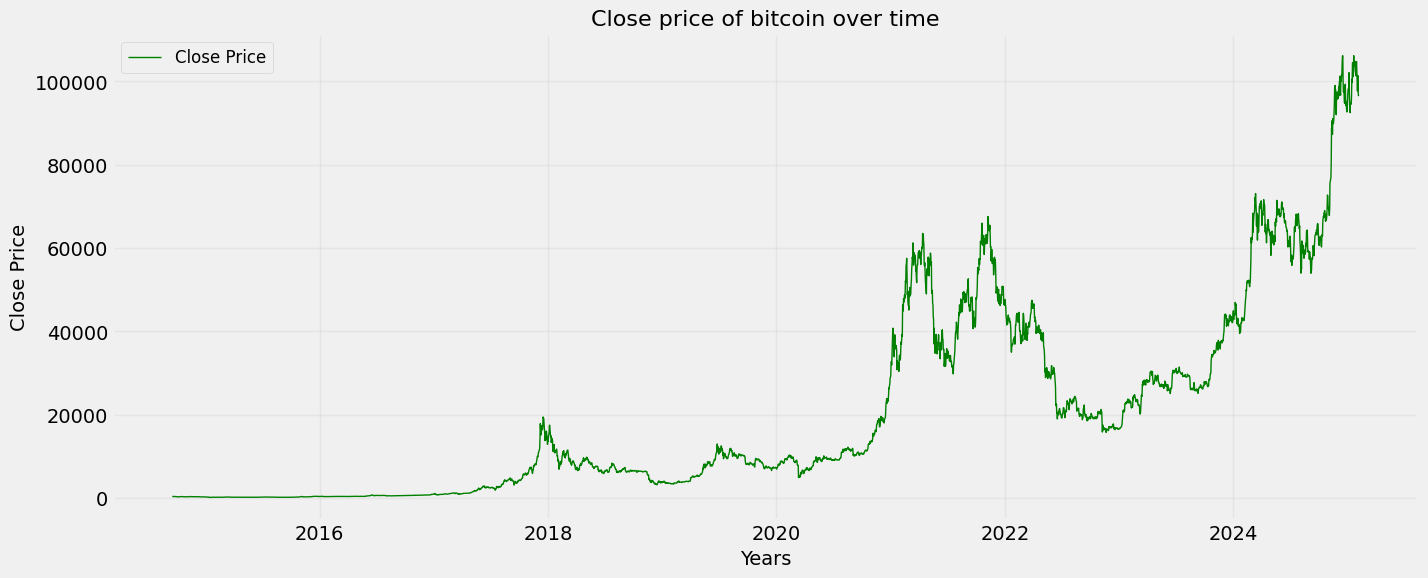

In [22]:
#plotting  closing price 
plt.figure(figsize=(15,6))#15 inches wide and 6 inches tall for better readability
#
plt.plot(closing_price.index, closing_price['Close'], label='Close Price', color='green', linewidth=1)
plt.title("Close price of bitcoin over time", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


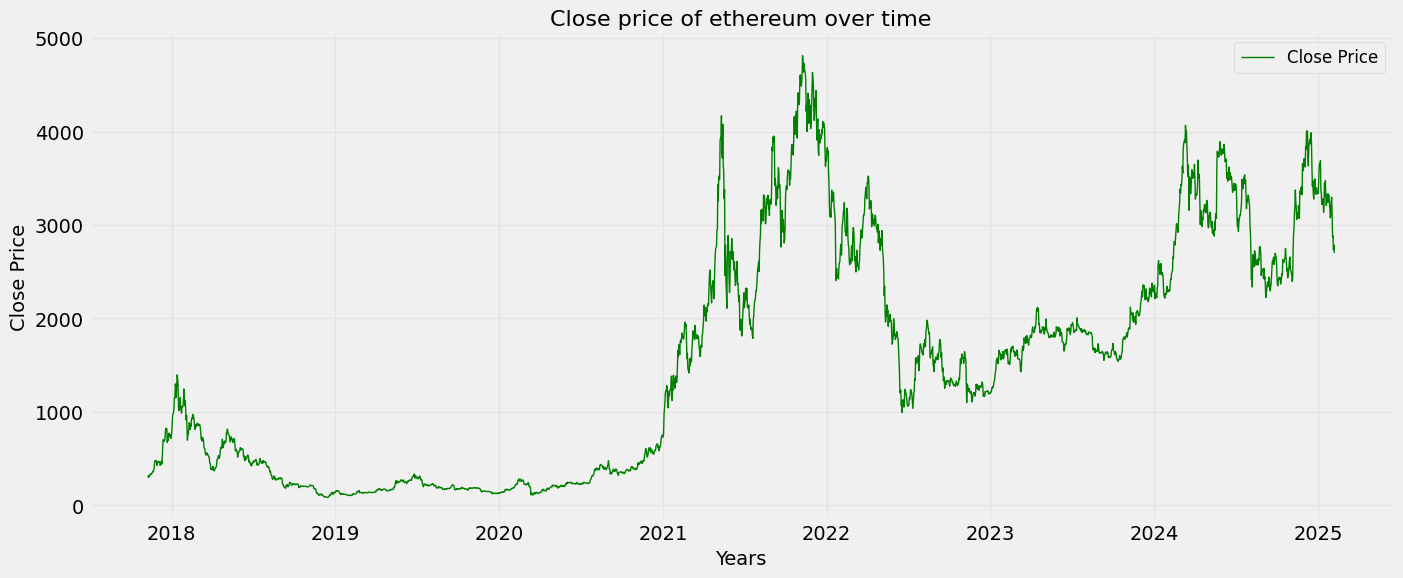

In [23]:
#plotting  closing price eth
plt.figure(figsize=(15,6))#15 inches wide and 6 inches tall for better readability
#
plt.plot(closing_price_eth.index, closing_price_eth['Close'], label='Close Price', color='green', linewidth=1)
plt.title("Close price of ethereum over time", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [24]:
temp_data=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)

40.0


In [25]:
df1 = pd.DataFrame(temp_data)
df2=pd.DataFrame(temp_data)

In [26]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [27]:
for i in range(2014,2025):
    print(i,list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [28]:
for i in range(2014,2025):
    print(i,list(stock_data_eth.index.year).count(i))

2014 0
2015 0
2016 0
2017 53
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [29]:
closing_price['MA_365']=closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100']=closing_price['Close'].rolling(window=100).mean()


C:\Users\Raj Desai\AppData\Local\Temp\ipykernel_3264\3820451448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365']=closing_price['Close'].rolling(window=365).mean()
C:\Users\Raj Desai\AppData\Local\Temp\ipykernel_3264\3820451448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100']=closing_price['Close'].rolling(window=100).mean()


In [30]:
closing_price_eth['MA_365']=closing_price_eth['Close'].rolling(window=365).mean()
closing_price_eth['MA_50']=closing_price_eth['Close'].rolling(window=100).mean()

C:\Users\Raj Desai\AppData\Local\Temp\ipykernel_3264\3012270622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price_eth['MA_365']=closing_price_eth['Close'].rolling(window=365).mean()
C:\Users\Raj Desai\AppData\Local\Temp\ipykernel_3264\3012270622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price_eth['MA_50']=closing_price_eth['Close'].rolling(window=100).mean()


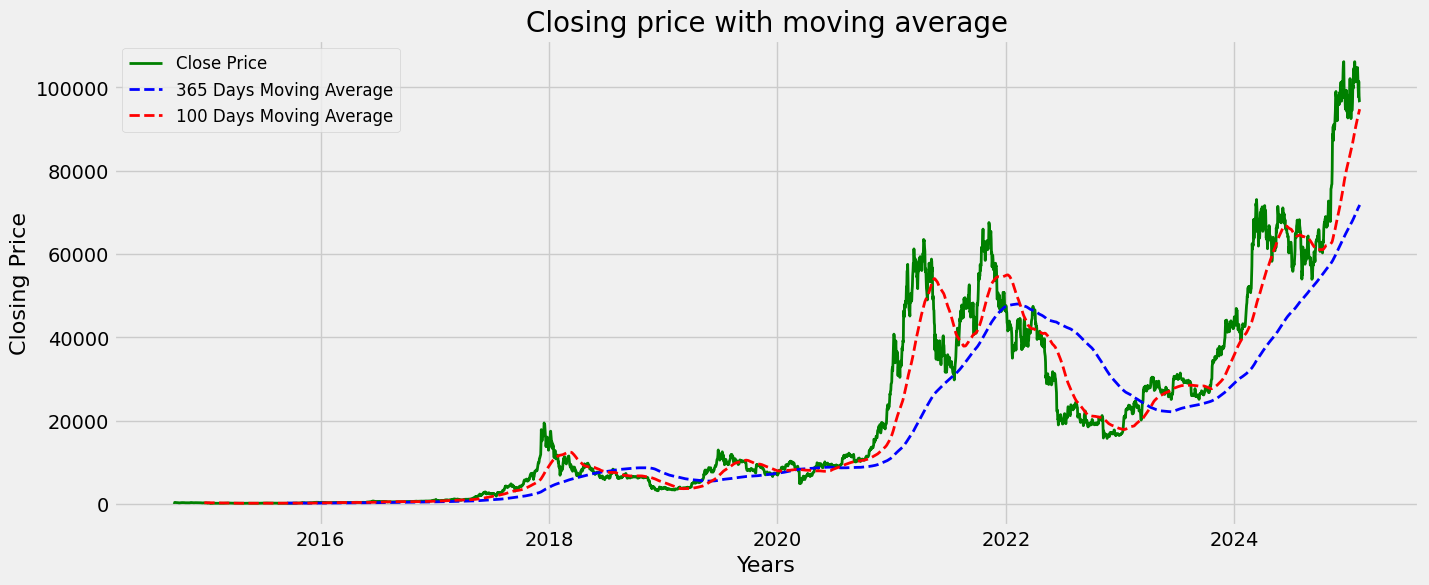

In [31]:
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'],label='Close Price',color='green',linewidth=2)
plt.plot(closing_price.index, closing_price['MA_365'],label='365 Days Moving Average',color='blue',linestyle='--',linewidth=2)
plt.plot(closing_price.index, closing_price['MA_100'],label='100 Days Moving Average',color='red',linestyle='--',linewidth=2)

plt.title("Closing price with moving average",fontsize=20)
plt.xlabel("Years",fontsize=16)
plt.ylabel("Closing Price",fontsize=16)
plt.grid(0.3)
plt.legend(fontsize=12)
plt.show()



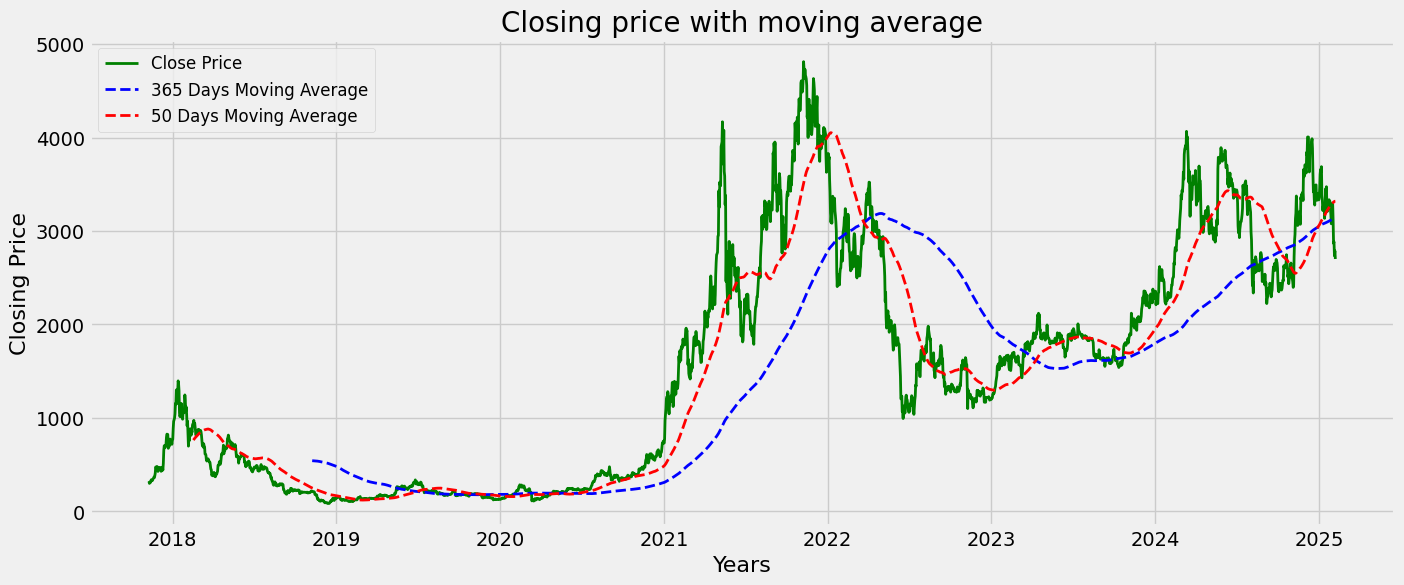

In [32]:
plt.figure(figsize=(15,6))
plt.plot(closing_price_eth.index, closing_price_eth['Close'],label='Close Price',color='green',linewidth=2)
plt.plot(closing_price_eth.index, closing_price_eth['MA_365'],label='365 Days Moving Average',color='blue',linestyle='--',linewidth=2)
plt.plot(closing_price_eth.index, closing_price_eth['MA_50'],label='50 Days Moving Average',color='red',linestyle='--',linewidth=2)

plt.title("Closing price with moving average",fontsize=20)
plt.xlabel("Years",fontsize=16)
plt.ylabel("Closing Price",fontsize=16)
plt.grid(0.3)
plt.legend(fontsize=12)
plt.show()



In [45]:
# LSTM --> Long Short Term Memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(closing_price[['Close']].dropna())

In [46]:
closing_price.isnull().sum()

Price   Ticker 
Close   BTC-USD      0
MA_365             364
MA_100              99
dtype: int64

In [34]:
len(scaled_data)

3796

In [35]:
scaled_data

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.92191574],
       [0.91005959],
       [0.90847553]])

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
# Prepare data for LSTM
x_data=[]
y_data=[]
base_days=100
for i in range(base_days,len(scaled_data)):
    x_data.append(scaled_data[i-base_days : i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data) 

In [39]:
# Split into train and test sets
train_size = int(len(x_data)*0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [50]:
model= Sequential([
    LSTM(128, return_sequences= True, input_shape = (x_train.shape[1], 1)),
    LSTM(128, return_sequences= False),
    Dense(25),
    Dense(1)

])

model.compile(optimizer = "adam", loss="mean_squared_error", metrics=['mae'])
model.summary()

c:\Users\Raj Desai\Documents\GitHub\Crypto-Predication\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,395 (786.70 KB)

 Trainable params: 201,395 (786.70 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
x_train.shape
y_train.shape

(3326, 1)

In [51]:
model.fit(x_train, y_train, batch_size=5, epochs=8)

Epoch 1/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - loss: 0.0012 - mae: 0.0199
Epoch 2/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - loss: 2.7562e-04 - mae: 0.0113
Epoch 3/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - loss: 1.6780e-04 - mae: 0.0089
Epoch 4/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - loss: 1.3214e-04 - mae: 0.0078
Epoch 5/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - loss: 1.1443e-04 - mae: 0.0072
Epoch 6/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - loss: 1.4346e-04 - mae: 0.0083
Epoch 7/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - loss: 1.4717e-04 - mae: 0.0082
Epoch 8/8
666/666 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - loss: 1.1425e-04 - mae: 0.0069


In [52]:
predictions= model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


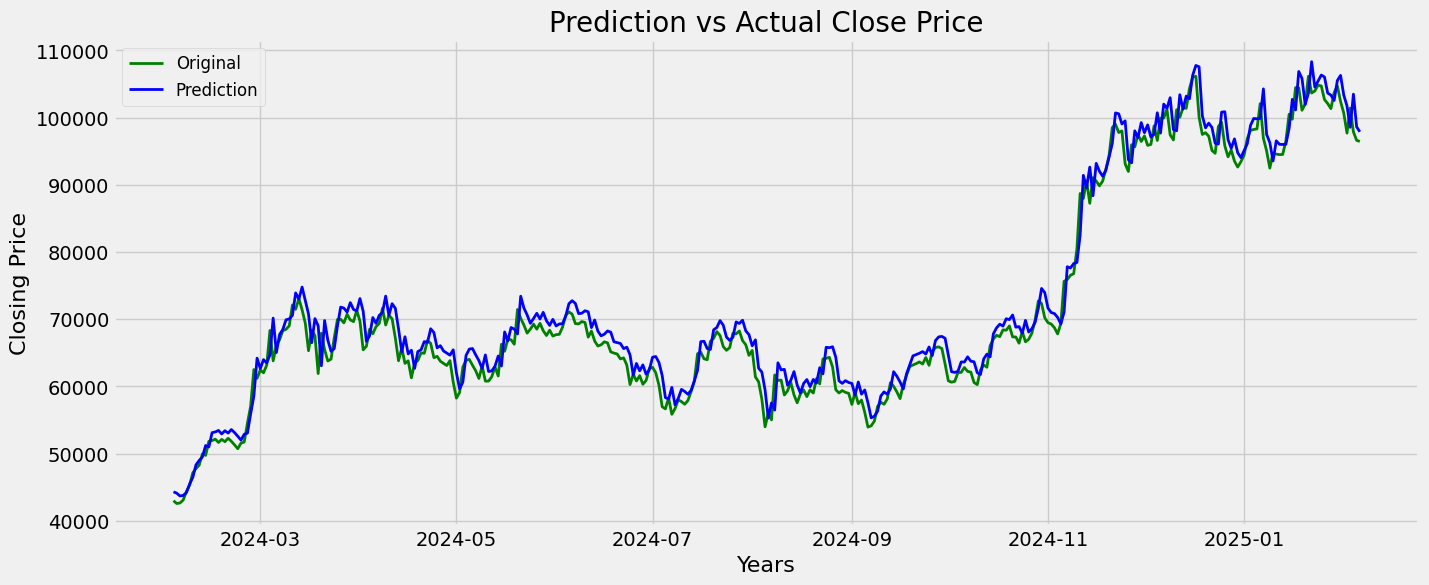

In [57]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index= closing_price.index[train_size + base_days:]
)


plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Original'],label='Original',color='green',linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'],label='Prediction',color='blue',linewidth=2)


plt.title("Prediction vs Actual Close Price",fontsize=20)
plt.xlabel("Years",fontsize=16)
plt.ylabel("Closing Price",fontsize=16)
plt.grid(0.3)
plt.legend(fontsize=12)
plt.show()